# CARGA DE LIBRERÍAS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# OBEJTIVO

Predicción del precio de apartamentos medido en dólares, mediante la implementación de algoritmos de Machine Learning, tomando la información de la Página Web https://www.infocasas.com.uy

# CARGA DE DATOS

Para formar el conjunto de datos a partir del cual entrenaremos nuestros modelos de Machine Learning, consideramos los siguientes barrios:

-Centro

-Malvin

-Pocitos

-Buceo

-Palermo

-Prado

In [ ]:

df1 = pd.read_csv('info_casas_centro.csv')
df2 = pd.read_csv('info_casas_malvin.csv')
df3 = pd.read_csv('info_casas_pocitosoversionvero1a20.csv')
df4 = pd.read_csv('info_casas_pocitosoversionvero21a30.csv', sep = ";")
df5 = pd.read_csv('info_casas_buceo.csv')
df6 = pd.read_csv('info_casas_palermo.csv')
df7 = pd.read_csv('info_casas_prado.csv')

nuevo_orden = ['Barrio', 'Estado', 'Disposicion', 'M2_Terraza', 'Anio_de_Construccion',
       'Garage', 'Piso', 'Total_Pisos', 'Dor', 'Banio', 'metros_cuadrados',
       'precio', 'GastosComunes']

In [ ]:
df2 = df2.drop(['SQF', '+Do', '+ B', '+m²'], axis=1)
df2 = df2[nuevo_orden]

df2.shape

(211, 13)

In [ ]:
df3 = df3.drop(['+Do', '+m²', '+ B'], axis=1)
df3 = df3[nuevo_orden]

df3.shape

(399, 13)

In [ ]:

df1 = df1.drop(['SQF', '76.', '+Do', '+m²', '+ B', '72.',
       '144', '47.', '95.', '31.', '67.', '103', '113', '83.', '55.', '88.',
       '125', '93.', '96.', '112', '146', '121', '105', '101', '79.', '46.',
       '179', '77.', '70.', '49.', '37.', '43.', '128', '71.', '+42'], axis=1)
df1 = df1[nuevo_orden]
df1.shape

(409, 13)

In [ ]:
df4.columns
df4 = df4[nuevo_orden]
df4.columns

Index(['Barrio', 'Estado', 'Disposicion', 'M2_Terraza', 'Anio_de_Construccion',
       'Garage', 'Piso', 'Total_Pisos', 'Dor', 'Banio', 'metros_cuadrados',
       'precio', 'GastosComunes'],
      dtype='object')

In [ ]:
df5.columns
df5 = df5.drop(['+Do', '+ B', '+m²', '87.', '59.', '50.',
       '62.', '49.', '73.', '51.', '53.', '77.', '72.', '58.', '80.', '45.',
       '30.', '68.', '37.', '60.', '33.', '55.'], axis=1)
df5.shape
df5 = df5[nuevo_orden]


In [ ]:
df6.columns
df6 = df6.drop(['+Do', '+m²', '71.', '30.', '44.', '43.',
       '48.', '33.', '41.', '59.', '46.', '55.', '61.', '38.', '45.', '39.',
       '53.', '42.', '76.', '50.'], axis=1)
df6 = df6[nuevo_orden]
df6.shape

(410, 13)

In [ ]:
df7.columns
df7 = df7.drop([ '33.', '57.', '74.', '+Do', '+ B', '+m²',
       '27.'], axis=1)
df7.columns
df7 = df7[nuevo_orden]


In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df  = df.reset_index()
df = df.drop('index', axis=1) # Eliminamos columna
df.head()

,Barrio,Estado,Disposicion,M2_Terraza,Anio_de_Construccion,Garage,Piso,Total_Pisos,Dor,Banio,metros_cuadrados,precio,GastosComunes
0,Centro,A estrenar,Al frente,42.0,2024.0,1.0,2.0,11.0,2,1,59.0,164900.0,5500.0
1,Centro,A estrenar,Contrafrente,NaN,2020.0,NaN,10.0,14.0,1,1,40.0,127850.0,3850.0
2,Centro,A estrenar,Al frente,52.0,2024.0,1.0,1.0,11.0,2,1,54.0,147900.0,5500.0
3,Centro,Excelente estado,Al frente,42.0,2016.0,1.0,4.0,10.0,2,1,55.0,142000.0,4600.0
4,Centro,A estrenar,Al frente,42.0,2024.0,1.0,1.0,11.0,2,1,75.0,164900.0,6900.0


# PREPROCESAMIENTO DE DATOS

In [ ]:
df["Dor"].unique()

array([2, 1, 0])

Decidimos codificar las variables "Barrio" y "Diposicion" como ONE HOT ENCODING, porque son variables categóricas nominales (no presentan un orden de jerarquía entre sus categorías).
En este proceso, decidimoa eliminar una de las columnas generadas, porque es redundante.

In [ ]:
# Pasaje a One Hot Encoding
df = pd.get_dummies(df, columns=['Barrio'], drop_first=True)
df = pd.get_dummies(df, columns=['Disposicion'], drop_first=True)

# Pasaje a valores de ceros y unos de tales variables:
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)


Decidimos codificar la variable "Estado" con codificación de enteros, porque consideramos que es una variable categórica ordinal, y por lo tanto existe un orden de jerarquía entre sus categorías.

In [ ]:
df["Estado"].unique()

array(['A estrenar', 'Excelente estado', 'Buen estado', 'En construcción',
       'Sin Definir', 'En Pozo', 'Reciclada', 'Requiere mantenimiento',
       'A reciclar', nan], dtype=object)

In [ ]:
mapeo_estado = {
    'Sin Definir': 0,
    'En Pozo': 1,
    'En construcción': 2,
    'Requiere mantenimiento': 3,
    'A reciclar': 4,
    'Reciclada': 5,
    'Buen estado': 6,
    'Excelente estado': 7,
    'A estrenar': 8
}

df['Estado'] = df['Estado'].map(mapeo_estado)
df['Estado'].unique()


array([ 8.,  7.,  6.,  2.,  0.,  1.,  5.,  3.,  4., nan])

# ANALISIS DE VALORES NULOS

In [ ]:
# Calculamos el porcentaje de valores nulos por cada variable
nulos_por_columna = df.isnull().mean()*100
nulos_por_columna

,0
Estado,0.194458
M2_Terraza,64.365581
Anio_de_Construccion,27.078269
Garage,79.144385
Piso,49.586777
Total_Pisos,80.602820
Dor,0.000000
Banio,0.000000
metros_cuadrados,6.708799
precio,0.000000


In [ ]:
# Mostramos la cantidad de valores nulos por cada variable
nulos_por_columna = df.isnull().sum()
nulos_por_columna

,0
Estado,4
M2_Terraza,1324
Anio_de_Construccion,557
Garage,1628
Piso,1020
Total_Pisos,1658
Dor,0
Banio,0
metros_cuadrados,138
precio,0


<Axes: >

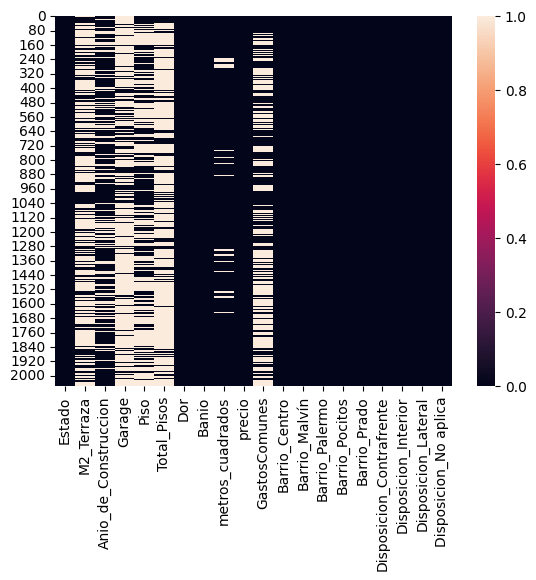

In [ ]:
sns.heatmap(df.isnull())

Dedicimos eliminar las variables predictoras:
-Anio_de_Construccion
-Total_Pisos

Porque poseen en una gran cantidad de valores nulos (la primera presenta un 27% de valores nulos, y la segunda presenta un 80%)



In [ ]:
df = df.drop('Anio_de_Construccion', axis=1)
df = df.drop('Total_Pisos', axis=1)

Para las variables "metros_cuadrados" y "Estado" decidimos eliminar los registros que tienen valores nulos.

Se toma este decisión para "metros_cuadrados" porque consideramos que ningun criterio específico para imputar un valor a dicha variable tiene sentido, y la cantidad de registros nulos es baja.

En el caso de la variable "Estado", únicamente 4 registros tiene valores nulos, por lo cual, consideramos que no afectará el modelo eliminar estas observaciones del conjunto de datos.


In [ ]:
df = df.dropna(subset=['metros_cuadrados'])
df = df.dropna(subset=['Estado'])

Para las variables:

-GastosComunes

-Garage

-Piso

-M2_Terraza

Decidimos sustituir los valores nulos por ceros. Asumimos que si tales variables vinieron con valores nulos, significa simplemente que el apartamento no poseé dichos atributos, por lo cual codificarlos como cero tiene sentido.

In [ ]:
df['GastosComunes'] = df['GastosComunes'].fillna(0)
df['Garage'] = df['Garage'].fillna(0)
df['Piso'] = df['Piso'].fillna(0)
df['M2_Terraza'] = df['M2_Terraza'].fillna(0)
df.head()

,Estado,M2_Terraza,Garage,Piso,Dor,Banio,metros_cuadrados,precio,GastosComunes,Barrio_Centro,Barrio_Malvín,Barrio_Palermo,Barrio_Pocitos,Barrio_Prado,Disposicion_Contrafrente,Disposicion_Interior,Disposicion_Lateral,Disposicion_No aplica
0,8.0,42.0,1.0,2.0,2,1,59.0,164900.0,5500.0,1,0,0,0,0,0,0,0,0
1,8.0,0.0,0.0,10.0,1,1,40.0,127850.0,3850.0,1,0,0,0,0,1,0,0,0
2,8.0,52.0,1.0,1.0,2,1,54.0,147900.0,5500.0,1,0,0,0,0,0,0,0,0
3,7.0,42.0,1.0,4.0,2,1,55.0,142000.0,4600.0,1,0,0,0,0,0,0,0,0
4,8.0,42.0,1.0,1.0,2,1,75.0,164900.0,6900.0,1,0,0,0,0,0,0,0,0


# ANALISIS DE LA DISTRIBUCIÓN ESTADÍSTICA DEL PRECIO

Realizamos un gráfico de boxplot y la densidad de la distribución de datos de la variable "precio"

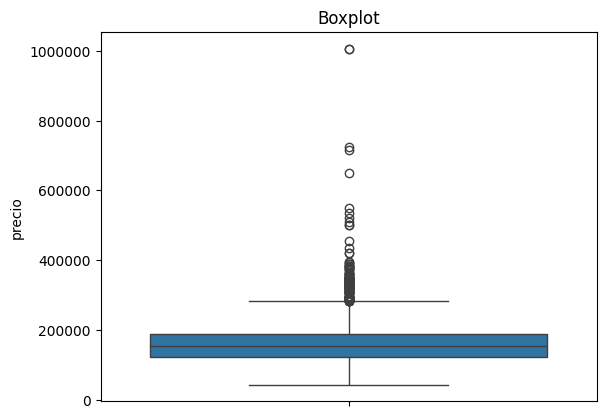

In [ ]:
# Boxplot
sns.boxplot(y=df['precio'])

plt.title("Boxplot")

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Se observa que existe una cierta cantidad de valores atípicos (apartamentos con valores superiores a los usd400 mil)

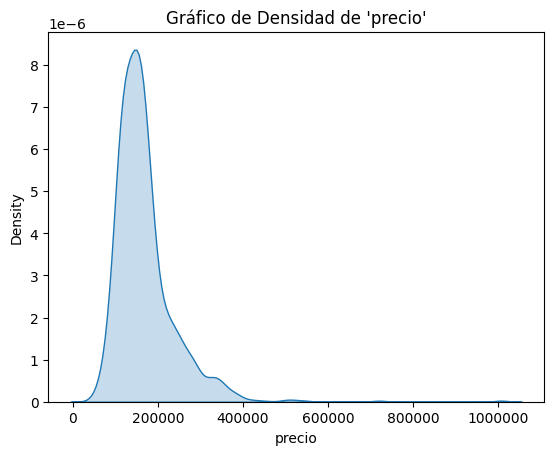

In [ ]:
# Densidad
sns.kdeplot(df['precio'], fill=True)

plt.title("Gráfico de Densidad de 'precio'")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

En este gráfico de densidad se observa una distribución sesgada hacia la derecha.El gráfico tiene una forma asimétrica, con una gran concentración de valores en la parte baja de la escala de precios (cerca de los 100 mil a 200 mil dólares), y una "cola larga" hacia la derecha. Esto indica que la mayoría de los apartamentos tienen precios relativamente bajos, pero hay algunos valores mucho más altos que están extendiendo la cola del gráfico.

La moda es fácilmente apreciable. El pico más alto en la curva sugiere que la mayor parte de los apartamentos tienen precios alrededor de los 100 mil a 20 mil dólares. Consideramos que este rango probablemente representa los precios más comunes en el mercado respecto a los barrios que decidimos tomar en consideración para el análisis.

Finalmente, como ya lo veíamos en el boxplot, La cola alargada hacia la derecha sugiere la presencia de apartamentos con precios significativamente más altos (posiblemente outliers), que están afectando la distribución general, pero que son menos frecuentes.

# ANALISIS DE LA DISTRIBUCION ESTADISTICA DE "metros_cuadrados"


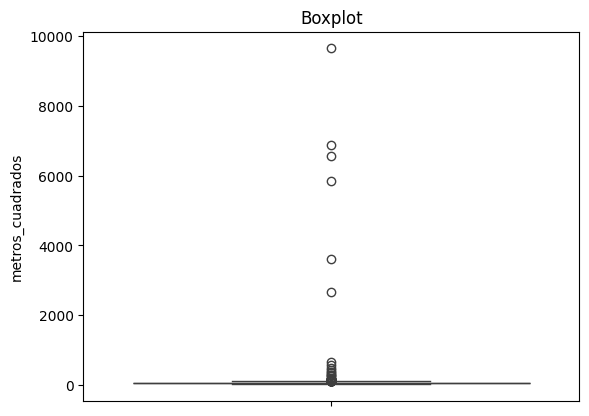

In [ ]:
# Boxplot
sns.boxplot(y=df['metros_cuadrados'])

plt.title("Boxplot")

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# TRATAMIENTO DE OUTLIERS

Decidimos eliminar los outliers mediante el método IQR, por el cual se consideraran atípicos todos aquellos precios que queden por debajo de un límite inferior (Q1 - 1.5IQR) y por encima de un límite superior (Q3 + 1.5IQR), y se procederá a eliminarlos del conjunto de datos

In [ ]:
# Calculo de cuartil 1 y cuartil 3
Q1 = df['precio'].quantile(0.25)
Q3 = df['precio'].quantile(0.75)

# Calculo de Rango Intercuartílico
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminación de valores atípicos de precios
df = df[(df['precio'] >= limite_inferior) & (df['precio'] <= limite_superior)]
df.head()

,Estado,M2_Terraza,Garage,Piso,Dor,Banio,metros_cuadrados,precio,GastosComunes,Barrio_Centro,Barrio_Malvín,Barrio_Palermo,Barrio_Pocitos,Barrio_Prado,Disposicion_Contrafrente,Disposicion_Interior,Disposicion_Lateral,Disposicion_No aplica
0,8.0,42.0,1.0,2.0,2,1,59.0,164900.0,5500.0,1,0,0,0,0,0,0,0,0
1,8.0,0.0,0.0,10.0,1,1,40.0,127850.0,3850.0,1,0,0,0,0,1,0,0,0
2,8.0,52.0,1.0,1.0,2,1,54.0,147900.0,5500.0,1,0,0,0,0,0,0,0,0
3,7.0,42.0,1.0,4.0,2,1,55.0,142000.0,4600.0,1,0,0,0,0,0,0,0,0
4,8.0,42.0,1.0,1.0,2,1,75.0,164900.0,6900.0,1,0,0,0,0,0,0,0,0


En el caso de la variable "metros_cuadrados", decidimos eliminar aquellos apartamentos con mayor cantidad a 100 metros cuadrados:

In [ ]:
# Filtrar los registros con metros cuadrados menores o iguales a 300
df = df[df['metros_cuadrados'] <= 100]
df.head()

,Estado,M2_Terraza,Garage,Piso,Dor,Banio,metros_cuadrados,precio,GastosComunes,Barrio_Centro,Barrio_Malvín,Barrio_Palermo,Barrio_Pocitos,Barrio_Prado,Disposicion_Contrafrente,Disposicion_Interior,Disposicion_Lateral,Disposicion_No aplica
0,8.0,42.0,1.0,2.0,2,1,59.0,164900.0,5500.0,1,0,0,0,0,0,0,0,0
1,8.0,0.0,0.0,10.0,1,1,40.0,127850.0,3850.0,1,0,0,0,0,1,0,0,0
2,8.0,52.0,1.0,1.0,2,1,54.0,147900.0,5500.0,1,0,0,0,0,0,0,0,0
3,7.0,42.0,1.0,4.0,2,1,55.0,142000.0,4600.0,1,0,0,0,0,0,0,0,0
4,8.0,42.0,1.0,1.0,2,1,75.0,164900.0,6900.0,1,0,0,0,0,0,0,0,0


In [ ]:
filas, columnas = df.shape
print("Filas", filas)
print("Columnas", columnas)

Filas 1733
Columnas 18


# CORRELACION DE VARIABLES

Deseamos que haya una alta correlación entre las variables predictoras y la variable a predecir.

Sin embargo, deseamos que dicha correlación sea baja entre las variables predictoras.

Al realizar la matriz de correlación, vemos que las variables que más correlacionan con el precio son: "Dor" y "Banio".

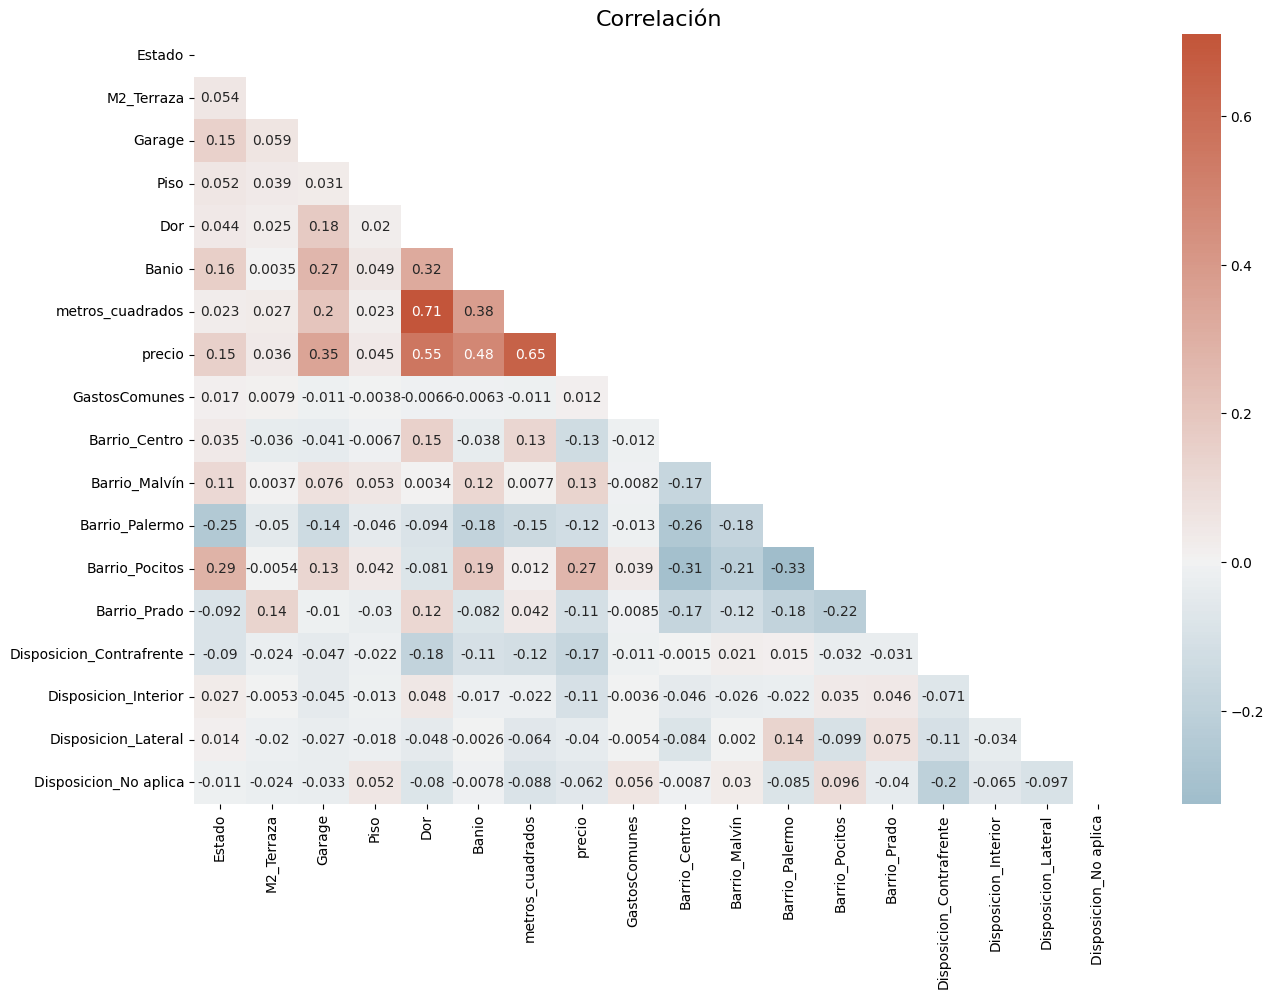

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0).set_title("Correlación", fontsize=16)

plt.show()

La matriz de correlación sugiere que el tamaño de la propiedad y características como el número de baños, el barrio y el estado del apartamento son los factores más influyentes en el precio de los apartamentos. Las correlaciones negativas en algunos barrios también sugieren que ciertas zonas tienden a tener precios más bajos. Las variables con correlación más baja, como GastosComunes o algunas disposiciones, no parecen tener un impacto significativo en los precios.

Consideramos que la variable "Piso" no se correlaciona tanto, porque seguramente es indistinto en que piso está el apartamento para el precio, a menos que se trate de un piso muy alto.

# PARTICION EN TRAIN Y TEST

En primer lugar, hacemos un "shuffle" de los datos, para que no haya sesgo en los datos, ya que al formar el conjunto de datos, hicimos concatenaciones por barrio.

Luego, separamos las variables predictoras de la variable a predecir, y finalmente, seleccionamos un 80% de los datos para entrenamiento, y un 20% de los mismos para test.


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,Estado,M2_Terraza,Garage,Piso,Dor,Banio,metros_cuadrados,precio,GastosComunes,Barrio_Centro,Barrio_Malvín,Barrio_Palermo,Barrio_Pocitos,Barrio_Prado,Disposicion_Contrafrente,Disposicion_Interior,Disposicion_Lateral,Disposicion_No aplica
0,6.0,0.0,0.0,4.0,2,1,58.0,162000.0,7000.0,0,0,0,0,1,0,1,0,0
1,8.0,0.0,1.0,0.0,2,2,66.0,241800.0,0.0,0,1,0,0,0,0,0,0,0
2,6.0,102.0,1.0,6.0,1,1,45.0,180000.0,12526.0,0,0,0,1,0,0,0,0,0
3,2.0,0.0,0.0,0.0,1,1,38.0,146900.0,0.0,0,0,1,0,0,0,0,0,0
4,7.0,102.0,1.0,2.0,2,1,57.0,192000.0,9000.0,0,0,0,0,1,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('precio', axis=1)
y = df['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A continuación, guardamos información que luego utilizaremos en nuestras conclusiones finales:

In [ ]:
X_test_aux = X_test.copy()

X_test_aux['Barrio'] = X_test_aux[['Barrio_Centro', 'Barrio_Malvín', 'Barrio_Palermo', 'Barrio_Pocitos', 'Barrio_Prado']].idxmax(axis=1)

# Usar map para reemplazar los nombres de columnas por los nombres de los barrios
X_test_aux['Barrio'] = X_test_aux['Barrio'].map({
    'Barrio_Centro': 'Centro',
    'Barrio_Malvín': 'Malvín',
    'Barrio_Palermo': 'Palermo',
    'Barrio_Pocitos': 'Pocitos',
    'Barrio_Prado': 'Prado'
})

mapeo_estado = {
    'Sin Definir': 0,
    'En Pozo': 1,
    'En construcción': 2,
    'Requiere mantenimiento':3,
    'A reciclar':4,
    'Reciclada':5,
    'Buen estado': 6,
    'Excelente estado': 7,
    'A estrenar': 8
}
mapeo_invertido = {v: k for k, v in mapeo_estado.items()}


X_test_aux['Estado'] = X_test_aux['Estado'].replace(mapeo_invertido)
X_test_aux['Estado'].unique()

X_test_aux = X_test_aux[["Barrio", "Dor", "Banio", "metros_cuadrados", "Estado"]]

X_test_aux.head()

,Barrio,Dor,Banio,metros_cuadrados,Estado
1643,Pocitos,0,1,20.0,Buen estado
506,Prado,2,1,65.0,En construcción
937,Pocitos,2,1,65.0,Buen estado
1502,Centro,2,1,84.0,Sin Definir
1664,Pocitos,1,1,36.0,Excelente estado


In [ ]:
# Convertimos datos a tipo de dato "array de numpy"
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train.shape

(1386, 17)

# ESTANDARIZACION

Se observa que las variables predictoras tienen escalas muy diferentes, por lo cual, los algoritmos podrían dar más importancia a una característica de mayor escala, afectando negativamente el rendimiento de nuestros modelos.


 Calcular la media y la desviación estándar en los datos de test introduciría información de los mismos en nuestros modelos, lo que es conocido como "data leakage". Al aplicar la transformación solo basada en el conjunto de entrenamiento, evitamos que los modelos tengan acceso a información del futuro.

In [ ]:
# Calculo de la media de los datos de entrenamiento
x_train_mean = np.mean(X_train, axis = 0)

# Extracción de la media
x_train = X_train - x_train_mean
x_test = X_test - x_train_mean

# Calculo del desvío estándar de los datos de entrenamiento
x_train_var = np.std(X_train, axis = 0)

# Estandarización
x_train = x_train / x_train_var
x_test = x_test / x_train_var

# REGRESION LINEAL

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

En primer lugar, probamos una regresión lineal múltiple, sin regularización, y con regularización Ridge y Lasso:

In [ ]:
# Entrenamiento de los modelos:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

regr_l1 = Lasso(alpha=0.1)
regr_l1.fit(x_train, y_train)

regr_l2 = Ridge(alpha=0.1)
regr_l2.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Coeficientes de las regresiones:
print("Sin Regularizacion", regr.coef_)
print("L1", regr_l1.coef_)
print("L2", regr_l2.coef_)

Sin Regularizacion [ 3.69753593e+02  1.55063946e+00  1.39189511e+04 -6.89196731e+00
  1.33771767e+04  1.83450022e+04  1.20013064e+03  1.07831579e-05
 -1.87062093e+04  1.26562465e+04  1.03700570e+03  1.62369602e+04
 -1.90946629e+04 -7.63075499e+03 -3.72672063e+04 -5.31909886e+02
 -5.66858824e+03]
L1 [  993.82288277   693.29603991  6161.91872283  -121.87192567
  9873.00108697  5986.78196006 18941.37052044   621.67806627
 -7408.67459773  3789.34539745   427.30017223  7266.51544646
 -6034.8429123  -2915.45048463 -5596.78642622  -109.82754362
 -2082.69294214]
L2 [  993.93360396   693.35616691  6161.84895545  -121.91788003
  9873.30675225  5987.1812156  18939.65429379   621.73668263
 -7407.89921669  3789.37508046   427.56619652  7266.4652347
 -6034.23716425 -2915.42245959 -5596.52779944  -110.02540728
 -2082.70743629]


In [ ]:
# Realizamos predicciones:
y_pred = regr.predict(x_test)
y_pred_l1 = regr_l1.predict(x_test)
y_pred_l2 = regr_l2.predict(x_test)

In [ ]:
# Resultados de las métricas:
print("MAE")
print(f'(regresion base) = {mean_absolute_error(y_test, y_pred)}')
print(f'(Lasso) = {mean_absolute_error(y_test, y_pred_l1)}')
print(f'(Ridge) = {mean_absolute_error(y_test, y_pred_l2)}')
print("===\n")

print("MSE")
print(f'(regresion base) = {mean_squared_error(y_test, y_pred)}')
print(f'(Lasso) = {mean_squared_error(y_test, y_pred_l1)}')
print(f'(Ridge) = {mean_squared_error(y_test, y_pred_l2)}')
print("===\n")

print("RMSE")
print(f'(regresion base) = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'(Lasso) = {np.sqrt(mean_squared_error(y_test, y_pred_l1))}')
print(f'(Ridge) = {np.sqrt(mean_squared_error(y_test, y_pred_l2))}')
print("===\n")

print("R2 Score")
print(f'(regresion base) = {r2_score(y_test, y_pred)}')
print(f'(Lasso) = {r2_score(y_test, y_pred_l1)}')
print(f'(Ridge) = {r2_score(y_test, y_pred_l2)}')

MAE
(regresion base) = 100028.23044186582
(Lasso) = 19524.938599020945
(Ridge) = 19524.68476349913
===

MSE
(regresion base) = 12714528964.227013
(Lasso) = 703079893.4899033
(Ridge) = 703069351.2760035
===

RMSE
(regresion base) = 112758.72012499526
(Lasso) = 26515.65374434323
(Ridge) = 26515.454951329866
===

R2 Score
(regresion base) = -6.163145378953782
(Lasso) = 0.6038969666703888
(Ridge) = 0.6039029059710892


# ARBOL DE REGRESION

En primer lugar, hacemos un arbol de regresión sencillo:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arbol_regr = DecisionTreeRegressor(max_depth=5)
arbol_regr.fit(x_train, y_train)

y_pred_arbol = arbol_regr.predict(x_test)

mae_arbol = mean_absolute_error(y_test, y_pred_arbol)
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
r2_arbol = r2_score(y_test, y_pred_arbol)

print("MAE:", mae_arbol)
print("MSE:", mse_arbol)
print("R2 Score:", r2_arbol)
print("RMSE:", np.sqrt(mse_arbol))

MAE: 20758.150353792797
MSE: 774369154.4950122
R2 Score: 0.5637338318838363
RMSE: 27827.48918776202


A continuación, implementamos un Grid Search para elegir los mejores hiperparámetros que pueda utilizar nuestro arbol de regresión (esta técnica implementa cross validation, en este caso, con 5 folds):

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definición del modelo
arbol_grid = DecisionTreeRegressor(random_state=42)

# Hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Inicialización GridSearchCV
grid_search = GridSearchCV(estimator=arbol_grid, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenamiento GridSearch
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación del modelo con los mejores hiperparámetros
mejor_arbol = grid_search.best_estimator_
y_pred_mejor_arbol = mejor_arbol.predict(x_test)

# Calculo las métricas de evaluación
mae_mejor_arbol = mean_absolute_error(y_test, y_pred_mejor_arbol)
mse_mejor_arbol = mean_squared_error(y_test, y_pred_mejor_arbol)
r2_mejor_arbol = r2_score(y_test, y_pred_mejor_arbol)

print(f"MAE: {mae_mejor_arbol}")
print(f"MSE: {mse_mejor_arbol}")
print(f"RMSE: {np.sqrt(mse_mejor_arbol)}")
print(f"R2 Score: {r2_mejor_arbol}")


Mejores hiperparámetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
MAE: 20758.150353792797
MSE: 774369154.4950122
RMSE: 27827.48918776202
R2 Score: 0.5637338318838363


# RANDOM FOREST

A continuación, implementamos un Random Forest sencillo:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque_aleatorio_regresor = RandomForestRegressor(n_estimators=100, random_state=42)

bosque_aleatorio_regresor.fit(x_train, y_train)

y_prediccion_bosque = bosque_aleatorio_regresor.predict(x_test)

mae_bosque = mean_absolute_error(y_test, y_prediccion_bosque)
mse_bosque = mean_squared_error(y_test, y_prediccion_bosque)
r2_bosque = r2_score(y_test, y_prediccion_bosque)

print("Resultados del Random Forest:")
print(f"MAE: {mae_bosque}")
print(f"MSE: {mse_bosque}")
print(f"RMSE: {np.sqrt(mse_bosque)}")
print(f"R2 Score: {r2_bosque}")

Resultados del Random Forest:
MAE: 16071.930669132174
MSE: 525011415.50826967
RMSE: 22913.12758023814
R2 Score: 0.7042176626851798


Ahora, utilizaremos grid search para elegir los mejores hiperparámetros en un Random Forest:

In [ ]:
# Hiperparámetros
parametros_bosque = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

busqueda_bosque = GridSearchCV(RandomForestRegressor(random_state=42), parametros_bosque, cv=5, scoring='neg_mean_squared_error')

busqueda_bosque.fit(x_train, y_train)

print("Mejores hiperparámetros para Random Forest:")
print(busqueda_bosque.best_params_)

mejor_bosque = busqueda_bosque.best_estimator_
y_prediccion_mejor_bosque = mejor_bosque.predict(x_test)

mae_mejor_bosque = mean_absolute_error(y_test, y_prediccion_mejor_bosque)
mse_mejor_bosque = mean_squared_error(y_test, y_prediccion_mejor_bosque)
r2_mejor_bosque = r2_score(y_test, y_prediccion_mejor_bosque)

print(f"MAE: {mae_mejor_bosque}")
print(f"MSE: {mse_mejor_bosque}")
print(f"RMSE: {np.sqrt(mse_mejor_bosque)}")
print(f"R2 Score: {r2_mejor_bosque}")

Mejores hiperparámetros para Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 16064.815425112409
MSE: 525975241.2360982
RMSE: 22934.150109304206
R2 Score: 0.7036746599653908


# CONCLUSION DE RESULTADOS DE MODELOS

Decidimos observar la métrica RMSE en cada modelo, y se determina que el RMSE más bajo fue el obtenido por el modelo de Random Forest simple.

Lógicamente, un RMSE más bajo indica un mejor ajuste del modelo, ya que los errores de predicción son menores.

RMSE Obtenido: 22913

Esto significa que, en promedio, el modelo se equivoca por aproximadamente 23 mil dólares al predecir el precio de un apartamento.  

Consideramos que es un error aceptable, dada la magnitud de los precios de los apartamentos.



# ANALISIS DE PREDICCIONES

Se calcula la columna "Diferencia" como la diferencia entre las predicciones de nuestro modelo y los valores reales (las etiquetas del conjunto de test) sin valor absoluto.

Los valores positivos de esta diferencia significan que el valor predicho por nuestro modelo es mayor que el valor publicado del apartamento y los valores negativos implican lo contrario.

In [ ]:
diccionario = {"predicciones": y_prediccion_bosque,
               "reales": y_test,
               "Barrio": X_test_aux["Barrio"],
               "Dormitorios": X_test_aux["Dor"],
               "Metros cuadrados": X_test_aux["metros_cuadrados"],
               "Banio": X_test_aux["Banio"],
               "Estado": X_test_aux["Estado"]}
df_predicciones = pd.DataFrame(diccionario)
df_predicciones["Diferencia"] = df_predicciones["predicciones"] - df_predicciones["reales"]

A continuación, se ordenan los valores por la columna "Diferencia" de mayor a menor, y tomamos como criterio para definir si los apartamentos son caros o baratos el análisis de dicha columna.

Entonces, los valores más altos representan apartamentos más baratos, y los valores más bajos representan apartamentos más caros:

In [ ]:
df_predicciones_ordenado = df_predicciones.sort_values(by = "Diferencia", ascending = False)
df_predicciones_ordenado = df_predicciones_ordenado.reset_index()
df_predicciones_ordenado = df_predicciones_ordenado.drop("index", axis = 1)
df_predicciones_ordenado

,predicciones,reales,Barrio,Dormitorios,Metros cuadrados,Banio,Estado,Diferencia
0,188796.130000,79500.0,Pocitos,2,57.0,1,Buen estado,109296.130000
1,132509.290667,60000.0,Centro,1,42.0,1,A estrenar,72509.290667
2,143326.800000,73000.0,Centro,2,82.0,1,Buen estado,70326.800000
3,238743.100000,182721.0,Centro,2,100.0,2,En construcción,56022.100000
4,162949.300000,108000.0,Prado,2,57.0,1,Buen estado,54949.300000
...,...,...,...,...,...,...,...,...
342,134477.640000,197000.0,Malvín,1,40.0,1,A estrenar,-62522.360000
343,146580.340000,212000.0,Pocitos,1,40.0,1,Buen estado,-65419.660000
344,197011.110000,269900.0,Pocitos,1,89.0,1,Buen estado,-72888.890000
345,140084.265000,214205.0,Centro,1,45.0,1,En construcción,-74120.735000


Creamos una tabla con los diez apartamentos más baratos, y una tabla con los diez apartamentos más caros:

In [ ]:
df_mas_baratos = df_predicciones_ordenado.head(10)
df_mas_caros = df_predicciones_ordenado.tail(10)

In [ ]:
df_mas_baratos

,predicciones,reales,Barrio,Dormitorios,Metros cuadrados,Banio,Estado,Diferencia
0,188796.130000,79500.0,Pocitos,2,57.0,1,Buen estado,109296.130000
1,132509.290667,60000.0,Centro,1,42.0,1,A estrenar,72509.290667
2,143326.800000,73000.0,Centro,2,82.0,1,Buen estado,70326.800000
3,238743.100000,182721.0,Centro,2,100.0,2,En construcción,56022.100000
4,162949.300000,108000.0,Prado,2,57.0,1,Buen estado,54949.300000
5,155610.443333,102000.0,Malvín,0,50.0,1,En Pozo,53610.443333
6,190553.650000,145000.0,Centro,2,58.0,1,A estrenar,45553.650000
7,159068.650000,115000.0,Pocitos,0,44.0,1,Excelente estado,44068.650000
8,177959.033333,135000.0,Palermo,1,68.0,1,A estrenar,42959.033333
9,195922.060000,155000.0,Palermo,2,60.0,1,A estrenar,40922.060000


In [ ]:
df_mas_caros

,predicciones,reales,Barrio,Dormitorios,Metros cuadrados,Banio,Estado,Diferencia
337,155955.560000,210230.0,Pocitos,1,45.0,1,Buen estado,-54274.440000
338,187956.030000,242900.0,Pocitos,1,100.0,1,Excelente estado,-54943.970000
339,157429.380000,215000.0,Malvín,1,50.0,1,Buen estado,-57570.620000
340,146563.670000,205000.0,Centro,2,80.0,1,Sin Definir,-58436.330000
341,185308.180000,246000.0,Pocitos,1,67.0,1,Buen estado,-60691.820000
342,134477.640000,197000.0,Malvín,1,40.0,1,A estrenar,-62522.360000
343,146580.340000,212000.0,Pocitos,1,40.0,1,Buen estado,-65419.660000
344,197011.110000,269900.0,Pocitos,1,89.0,1,Buen estado,-72888.890000
345,140084.265000,214205.0,Centro,1,45.0,1,En construcción,-74120.735000
346,115543.843333,226499.0,Centro,1,38.0,1,En construcción,-110955.156667


Analizando las tablas anteriores identificamos casos donde el precio real es muy bajo en comparacion con la predicción del precio de nuestro modelo. Analizamos estos casos y vemos que refieren a propiedades que mantienen
saldos bancarios (BHU/Constructora) o refieren a precios de nuda propiedades. Entonces, los precios cargados en la página web no representan el valor total de la propiedad.
Esto no fue considerado en nuestro modelo, porque estos detalles están incluidos en las descripciones o en los encabezados de las propiedades y no se trata de información uniforme que podamos considerar en la construcción del modelo.